In [1]:
# import packages
import geopandas as gpd
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import os
import matplotlib.pyplot as plt
plt.ioff()
import numpy as np

In [2]:
# import meta data (from "sample")
s = pd.read_parquet(f"../data/sample.parquet")
# set index to FUA_ID 
s.index = s.apply(lambda x: int(x.eFUA_ID), axis = 1)

In [3]:
# get list of FUA_IDs:
myfolders = os.listdir("../data")
myfolders.remove("sample.parquet")
myfolders.remove('5629')

#### Plotting

In [4]:
# initialize lists for quantile values
maq = []
miq = []

# loop trough folders containing polygon data
for folder in myfolders[0:90]: # first 90 data sets
    
    i = int(folder)
    
    # read data
    polygons = gpd.read_parquet(f"../data/" + str(i) + "/polygons.parquet")
    
    # get title for plots
    mytitle = s.at[i, "eFUA_name"] + " (" + s.at[i, "Cntry_name"] + ")"
    
    #### "2D" PLOT:
    fig, ax = plt.subplots(1,1,figsize = (20,20))
    polygons[['area', 'reock']].plot.scatter('area', 'reock', ax=ax, color='b', s=.3)
    ax.set_xlim(0, 50000)
    ax.set_title(mytitle)
    fig.savefig("../plots/2d/" + folder + ".png")
    plt.close(fig)
    del(fig, ax)
    
    #### "1D" plot:
    
    # scale data for frequency plot
    data = polygons[['area', 'reock']]
    scaler = RobustScaler(with_centering=False)
    scaled = scaler.fit_transform(data)
    exp = 2
    index = ((scaled[:, 0] ** (1/exp)) * (scaled[:, 1] ** (1/exp)))
    fig, ax = plt.subplots(1,1, figsize = (20,8))
    pd.Series(index).plot.hist(ax = ax, bins=1000)
    ax.set_title(mytitle)
    fig.savefig("../plots/1d/" + folder + ".png")
    plt.close(fig)
    #### QUANTILES:
    
    # get 75% quantile for quantile plots
    maq.append(np.quantile(polygons["area"], 0.75))
    miq.append(np.quantile(index, 0.75))
    
    del(scaler, scaled, index)
    

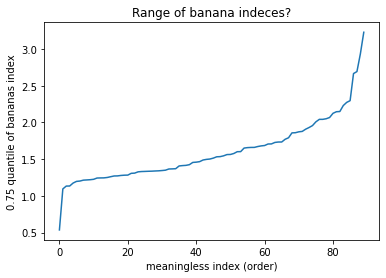

In [9]:
plt.plot(sorted(miq))
plt.xlabel("meaningless index (order)")
plt.ylabel("0.75 quantile of bananas index")
plt.title("Range of banana indeces?")
plt.show()

In [10]:
plt.close()

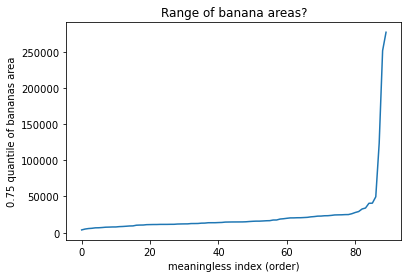

In [11]:
plt.plot(sorted(maq))
plt.xlabel("meaningless index (order)")
plt.ylabel("0.75 quantile of bananas area")
plt.title("Range of banana areas?")
plt.show()